1. 
- Stem or lemmatize the words and find counts.
- Select the top 20 words and create a bar chart.
- Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.
- Specify why you chose stemming or lemmatization.


-i chose lemmatization because it finds the reduced base of a word so its more "meaningful".Its also more accurate than stemming and is easier to understand. 

In [ ]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import gutenberg

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
pl = gutenberg.raw('milton-paradise.txt')
print(pl[:20])

[Paradise Lost by Jo


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\casim\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
tokens = word_tokenize(pl) 

sw = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
useless = {"thus", "yet","thou","thy","thee","though","may","till","like","thing","shall","u","hath","whose"}

fw = [
    lemmatizer.lemmatize(token.lower()) 
    for token in tokens
    if token.lower() not in sw and token not in useless
    and token.isalpha()
    ]

word_counts = Counter(fw) 
top = word_counts.most_common(20)
print(fw[:20])


['paradise', 'lost', 'john', 'milton', 'book', 'man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'mortal', 'taste', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'one']


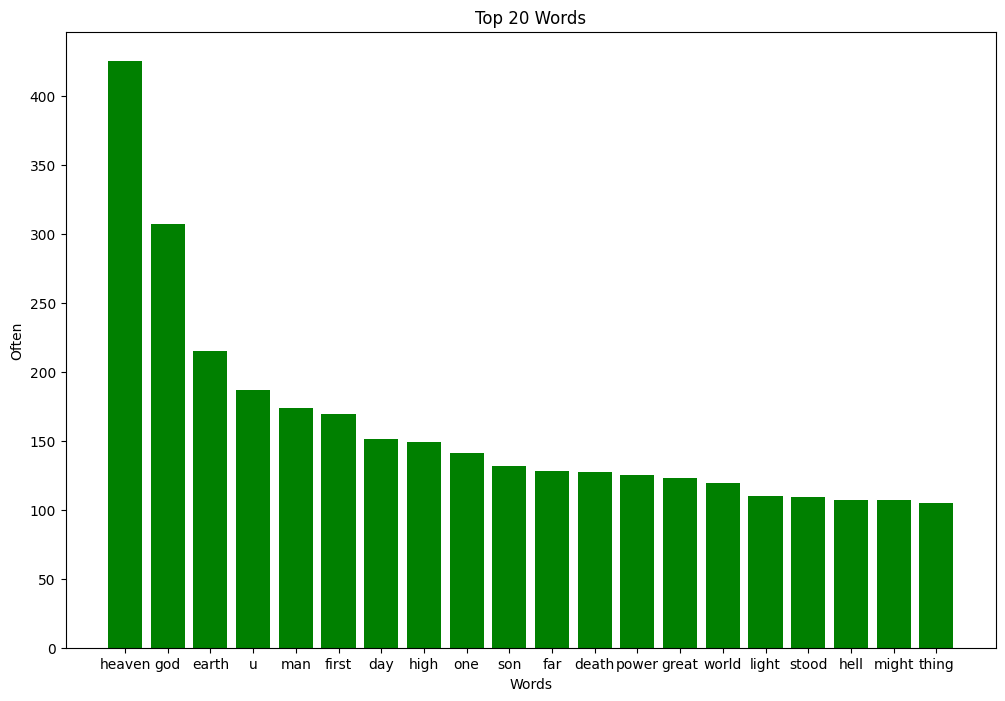

In [52]:
import matplotlib.pyplot as plt

words, counts = zip(*top)
plt.figure(figsize=(12, 8))
plt.bar(words, counts, color='green')
plt.title('Top 20 Words')
plt.xlabel('Words')
plt.ylabel('Often')
plt.show()


2. Perform Vader Sentiment Analysis on the book.
Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
pl = gutenberg.raw('milton-paradise.txt') 
sents = nltk.sent_tokenize(pl)
analyzer = SentimentIntensityAnalyzer()

#sample = sents[:100]

sentiments = []
for sent in sents:
    sentiment = analyzer.polarity_scores(sent)
    sentiments.append({
    "text": sent,
    "compound": sentiment['compound'],
    "positive": sentiment['pos'],
    "negative": sentiment['neg'],
    "neutral": sentiment['neu']
})


In [59]:
sort = sorted(sentiments, key=lambda x: x['compound']) 

negative = sort[:5] 
positive = sorted(sort[-5:], key=lambda x: x['compound'], reverse=True) 
neutral = sorted(sentiments, key=lambda x: abs(x['compound']))[:5] 

In [61]:
print("Most Negative Sentences:") 
for item in negative:
 print(f"Score: {item['compound']}, Sentence: {item['text']}") 

print("Most Positive Sentences:") 
for item in positive:
 print(f"Score: {item['compound']}, Sentence: {item['text']}") 

print("Most Neutral Sentences:") 
for item in neutral:
 print(f"Score: {item['compound']}, Sentence: {item['text']}") 


Most Negative Sentences:
Score: -0.9959, Sentence: For this he shall live hated, be blasphemed, 
Seised on by force, judged, and to death condemned 
A shameful and accursed, nailed to the cross 
By his own nation; slain for bringing life: 
But to the cross he nails thy enemies, 
The law that is against thee, and the sins 
Of all mankind, with him there crucified, 
Never to hurt them more who rightly trust 
In this his satisfaction; so he dies, 
But soon revives; Death over him no power 
Shall long usurp; ere the third dawning light 
Return, the stars of morn shall see him rise 
Out of his grave, fresh as the dawning light, 
Thy ransom paid, which Man from death redeems, 
His death for Man, as many as offered life 
Neglect not, and the benefit embrace 
By faith not void of works:  This God-like act 
Annuls thy doom, the death thou shouldest have died, 
In sin for ever lost from life; this act 
Shall bruise the head of Satan, crush his strength, 
Defeating Sin and Death, his two main arm

3. Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

The negative and positive sentences i can say are definitely in the category they are placed in but as for neutral im kind of iffy about it since the output isnt easy to understand. But overall i do believe the analysis is correct becasue wehn reading the sentences the words correlated with the sentiment. I could also tell the emotion based of the words and i could tell the negative from the positive. As for neutral it could be correct but i could not interpret it as well as the others. 